### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

%matplotlib inline

import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns

from sklearn import metrics

In [12]:
#Reading the file and dropping NAs if any
df = pd.read_csv("vehicle.csv").dropna()
df.sample(10, random_state=1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
381,106,54.0,100.0,227.0,67.0,4,250.0,27.0,27.0,162,280.0,923.0,262.0,88.0,5.0,11.0,182.0,182,bus
777,106,53.0,98.0,154.0,47.0,4,237.0,28.0,26.0,164,263.0,838.0,222.0,82.0,4.0,17.0,185.0,184,bus
570,105,53.0,108.0,206.0,63.0,12,222.0,31.0,25.0,168,226.0,712.0,201.0,71.0,15.0,35.0,189.0,203,car
837,94,46.0,77.0,169.0,60.0,8,158.0,42.0,20.0,148,181.0,373.0,181.0,67.0,12.0,2.0,193.0,199,car
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
588,89,38.0,78.0,153.0,61.0,7,146.0,46.0,19.0,127,166.0,314.0,142.0,69.0,0.0,9.0,187.0,194,car
264,103,49.0,100.0,194.0,60.0,10,185.0,35.0,22.0,160,202.0,518.0,178.0,62.0,13.0,8.0,198.0,208,car
631,103,49.0,107.0,179.0,54.0,12,208.0,32.0,24.0,159,214.0,644.0,183.0,66.0,1.0,12.0,191.0,200,car
807,103,51.0,105.0,174.0,56.0,11,210.0,32.0,24.0,163,222.0,650.0,222.0,73.0,8.0,9.0,187.0,196,car
715,100,52.0,109.0,225.0,68.0,10,222.0,30.0,25.0,165,241.0,731.0,207.0,73.0,7.0,28.0,188.0,199,car


In [13]:
#Confirming that all NAs have been dropped
#df.columns[df.isna().any() == True]
df.isna().any() == True

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [7]:
df.shape

(813, 19)

In [14]:
#Renaming Columns since a few columns have special chars
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [15]:
df.rename(columns={'pr.axis_aspect_ratio': 'pr_axis_aspect_ratio', \
                   'max.length_aspect_ratio' :'max_length_aspect_ratio',\
                   'pr.axis_rectangularity': 'pr_axis_rectangularity',\
                    'max.length_rectangularity' : 'max_length_rectangularity',\
                    'scaled_variance.1' : 'scaled_variance_1',\
                   'scaled_radius_of_gyration.1' :'scaled_radius_of_gyration_1',\
                    'scaled_radius_of_gyration.1' : 'scaled_radius_of_gyration_1',\
                   'skewness_about.1' : 'skewness_about_1',\
                   'skewness_about.2': 'skewness_about_2'}, inplace =True)

In [16]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class'],
      dtype='object')

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [87]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

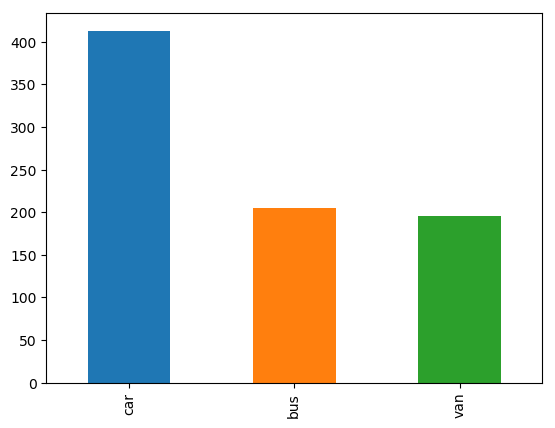

In [88]:
df['class'].value_counts().plot(kind='bar')

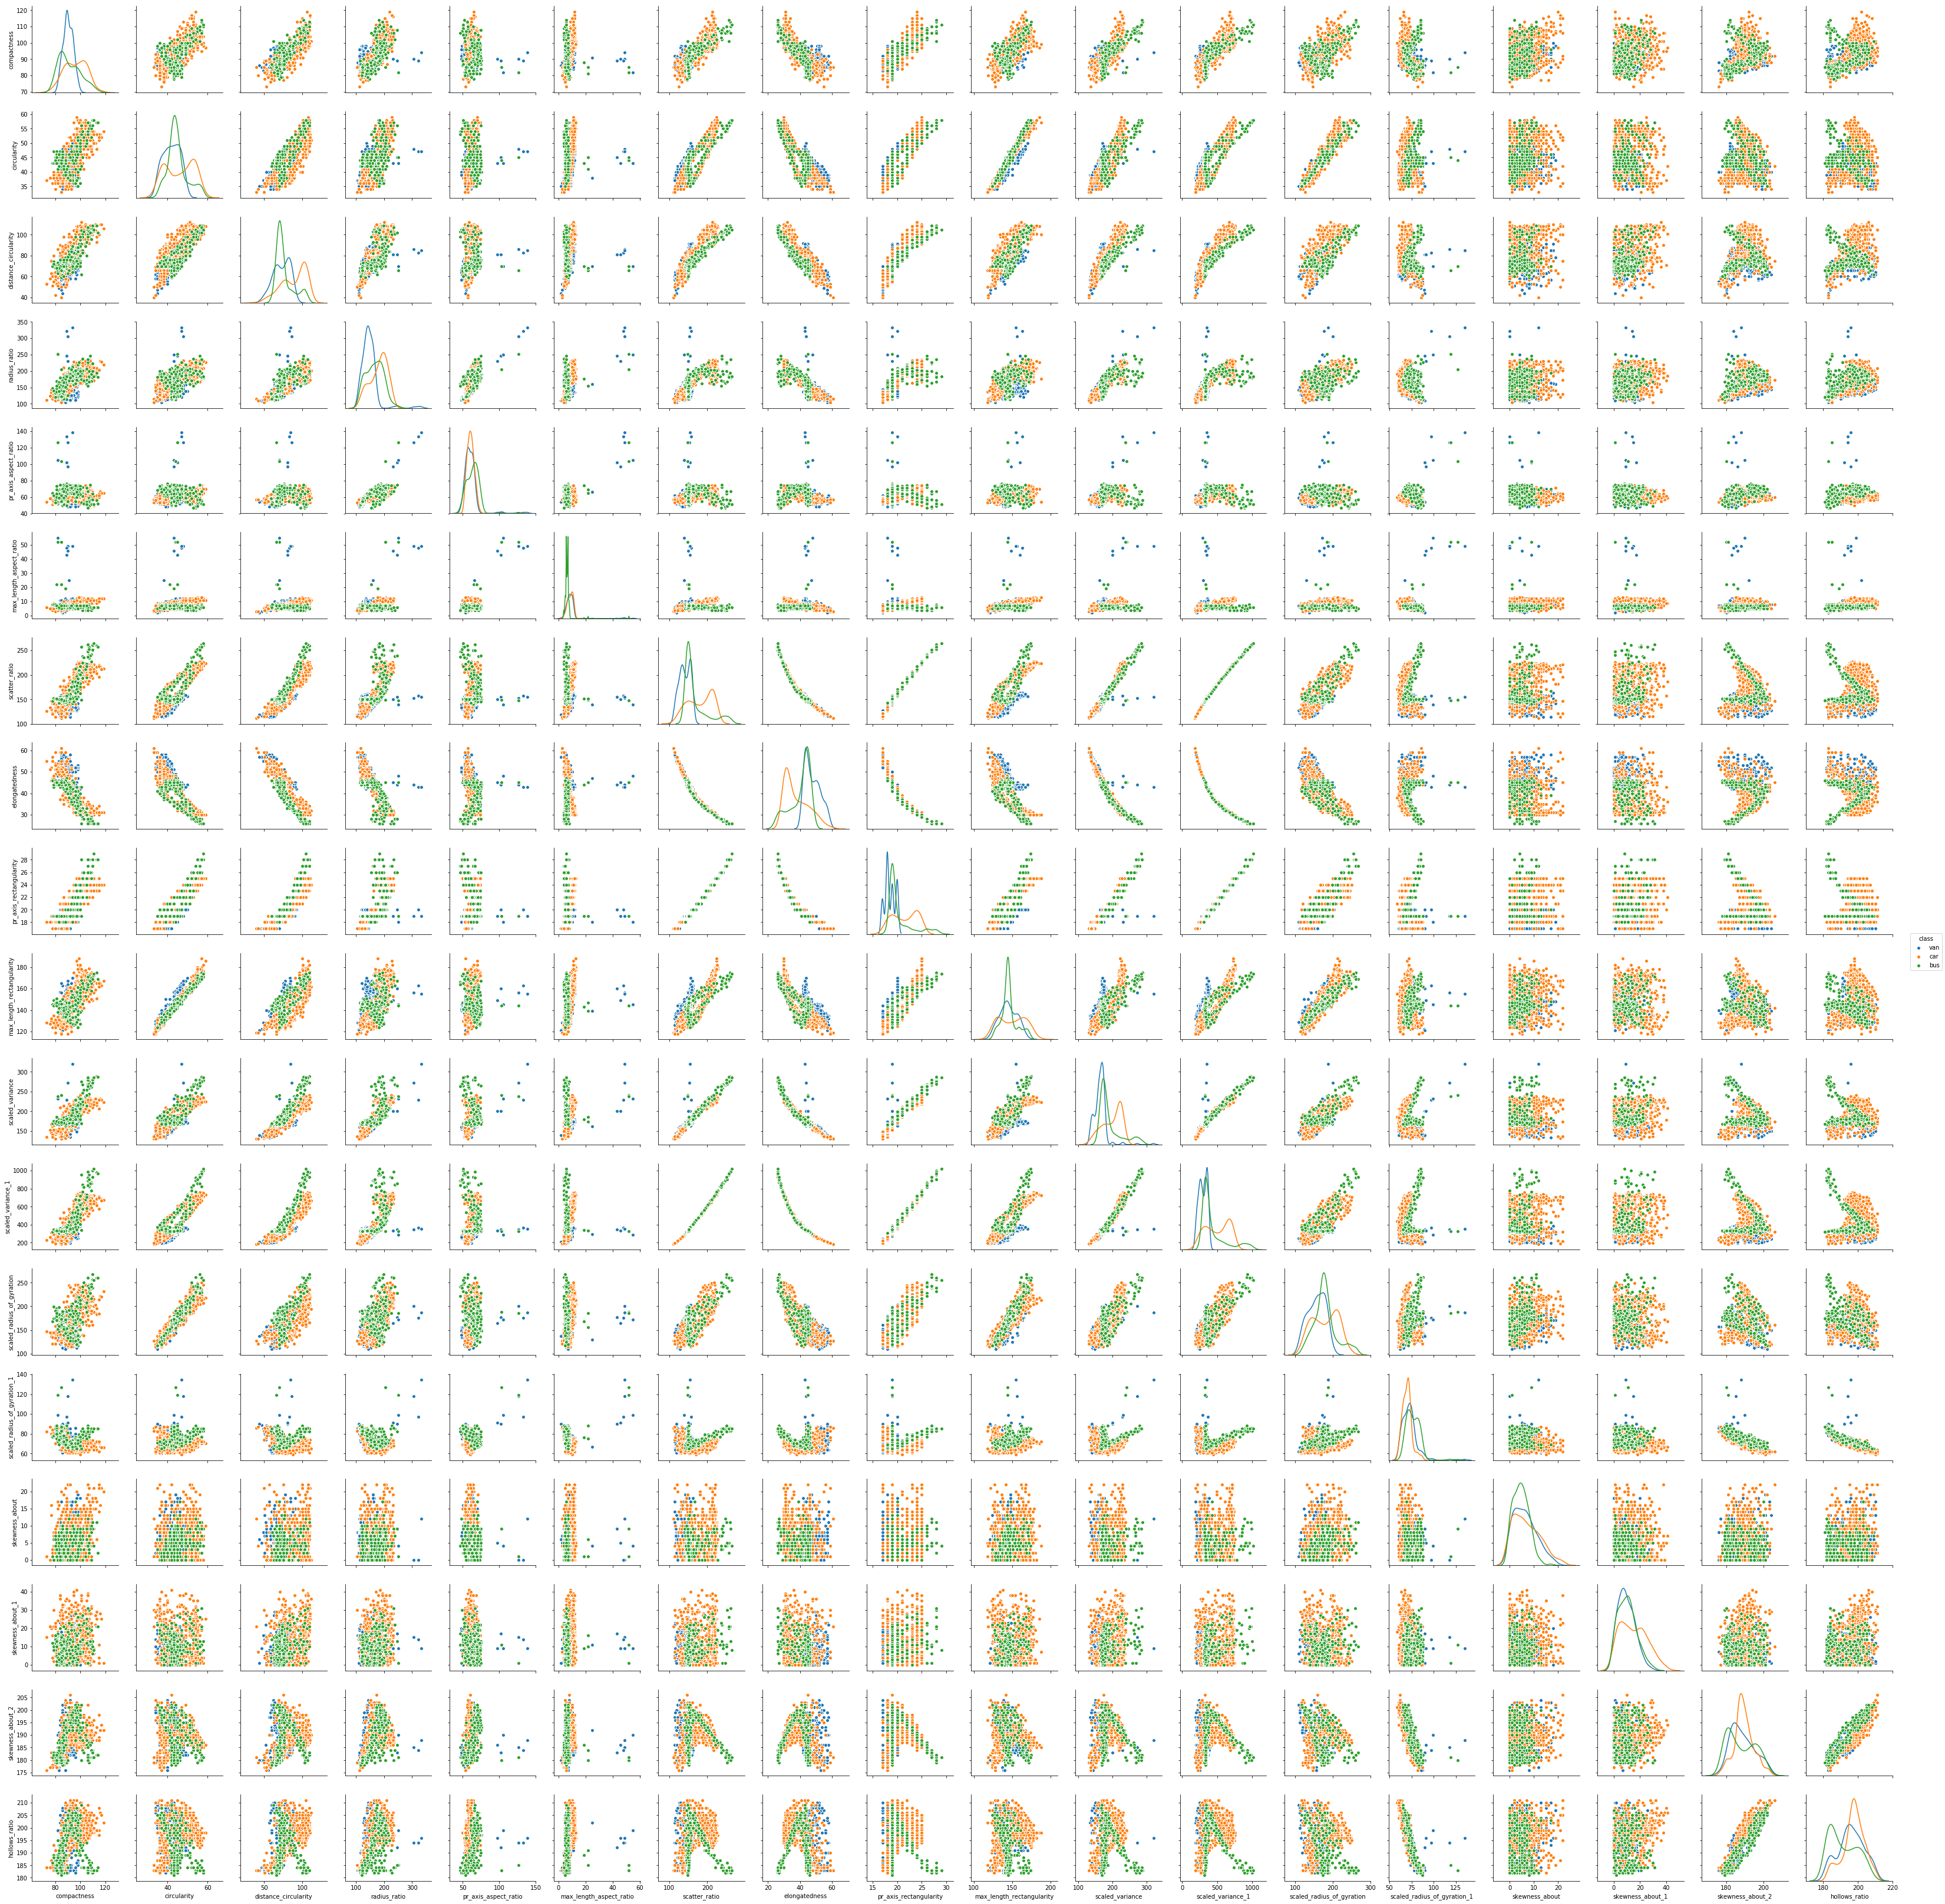

In [17]:
#Analyzing the relationship between the independent and dependent variables
sns.pairplot(df, diag_kind='kde',hue='class') 

### Check for any missing values in the data 

In [18]:
df.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr_axis_aspect_ratio           False
max_length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr_axis_rectangularity         False
max_length_rectangularity      False
scaled_variance                False
scaled_variance_1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration_1    False
skewness_about                 False
skewness_about_1               False
skewness_about_2               False
hollows_ratio                  False
class                          False
dtype: bool

In [19]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [48]:
from scipy.stats import zscore
#df_features = df.drop('class', axis =1)
#df_dummies= pd.get_dummies(df, prefix='class', columns=['class'])

df_features= df.copy(deep = True)
df_features = pd.get_dummies(df_features, columns=['class'])

In [49]:
df_features.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class_bus', 'class_car',
       'class_van'],
      dtype='object')

In [50]:
#Standardizing the data with zscores
df_z= df_features.apply(zscore)

In [51]:
#Checking for outliers
df_z[(df_z < -3) | (df_z > 3)].any()

compactness                     True
circularity                    False
distance_circularity           False
radius_ratio                    True
pr_axis_aspect_ratio            True
max_length_aspect_ratio         True
scatter_ratio                  False
elongatedness                  False
pr_axis_rectangularity          True
max_length_rectangularity      False
scaled_variance                 True
scaled_variance_1               True
scaled_radius_of_gyration      False
scaled_radius_of_gyration_1     True
skewness_about                  True
skewness_about_1                True
skewness_about_2               False
hollows_ratio                  False
class_bus                      False
class_car                      False
class_van                      False
dtype: bool

In [56]:
#Removing outliers
df_z = df_z[(df_z > -3) & (df_z < 3)].dropna()

In [57]:
#Confirming tha there are no outliers
df_z[(df_z < -3) | (df_z > 3)].any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr_axis_aspect_ratio           False
max_length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr_axis_rectangularity         False
max_length_rectangularity      False
scaled_variance                False
scaled_variance_1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration_1    False
skewness_about                 False
skewness_about_1               False
skewness_about_2               False
hollows_ratio                  False
class_bus                      False
class_car                      False
class_van                      False
dtype: bool

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

In [58]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics

### 4. Assign a dummy array called distortion

In [59]:
distortion=[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [60]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
  
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14976.810330
1,2,8930.315612
2,3,7381.803079
3,4,6443.324551
4,5,5802.259448
5,6,5239.731243
6,7,4752.444463
7,8,4374.401652
8,9,4081.075324


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

In [61]:
distortion = clusters_df.cluster_errors

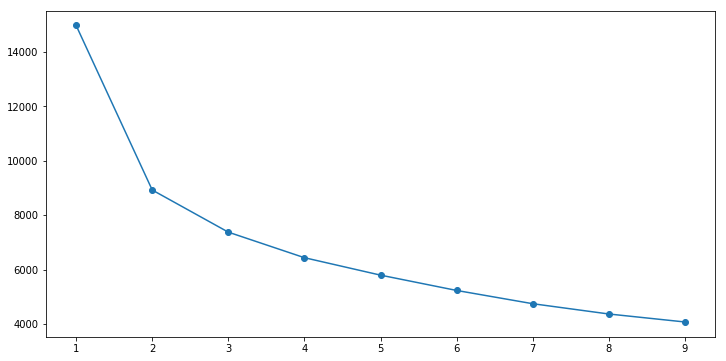

In [62]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

Text(0,0.5,'Distortion')

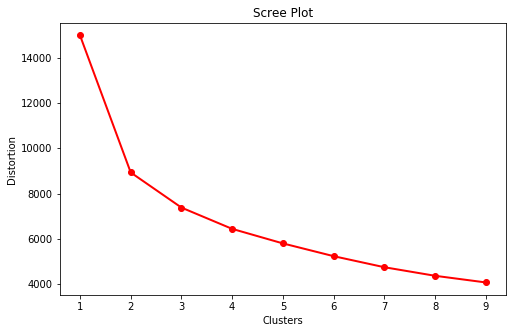

In [63]:
fig = plt.figure(figsize=(8,5))

plt.plot(clusters_df.num_clusters, distortion, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Clusters')
plt.ylabel('Distortion')

### Find out the optimal value of K

####  Conclusion : The optimal K value seems to be 5

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [64]:
kmeans = KMeans(n_clusters= 5, n_init = 10, random_state=2345)

In [65]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [66]:
# Getting the cluster labels
prediction = kmeans.predict(df_z)
len= prediction.shape[0]
len


792

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [67]:
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.23481137 -0.65451235 -0.07623428  0.0514273  -0.19910681 -0.16380702
  -0.24301012  0.08504678 -0.29041499 -0.70488684 -0.17567886 -0.28233775
  -0.62093275 -0.77800696 -0.01553767  0.40540129  0.68798817  0.59911899
  -0.58066432  0.98413566 -0.56172411]
 [-1.11920937 -0.68484592 -1.10727269 -1.19655047 -0.60782793 -0.45636328
  -0.84646563  0.96353139 -0.81614469 -0.74709247 -0.88138222 -0.83856764
  -0.46222015  1.03636642 -0.05636928 -0.26295721 -1.26309627 -1.38888991
   0.44917257 -0.23341131 -0.1835198 ]
 [ 1.15265125  1.21488604  1.25978946  0.97285268  0.07457127  0.26482996
   1.30782913 -1.22087865  1.31493532  1.14114454  1.19702344  1.3127934
   1.10991049 -0.14943557  0.14662712  0.26689499 -0.02870206  0.22871939
  -0.30392942  0.74376158 -0.56172411]
 [-0.11950356 -0.32676536 -0.44263403  0.36520457  0.85424745 -0.46870209
  -0.22135637 -0.0496102  -0.30444671 -0.45853939 -0.14579005 -0.21726108
  -0.32075733 -0.18325115 -0.3453777  -0.28523

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [68]:
centroid_df = pd.DataFrame(centroids, columns = list(df_features) )
centroid_df.transpose()
#centroid_df

,0,1,2,3,4
compactness,-0.234811,-1.119209,1.152651,-0.119504,-0.343128
circularity,-0.654512,-0.684846,1.214886,-0.326765,-0.371923
distance_circularity,-0.076234,-1.107273,1.259789,-0.442634,-0.424209
radius_ratio,0.051427,-1.196550,0.972853,0.365205,-0.661101
pr_axis_aspect_ratio,-0.199107,-0.607828,0.074571,0.854247,-0.161551
max_length_aspect_ratio,-0.163807,-0.456363,0.264830,-0.468702,0.051449
scatter_ratio,-0.243010,-0.846466,1.307829,-0.221356,-0.764796
elongatedness,0.085047,0.963531,-1.220879,-0.049610,0.796120
pr_axis_rectangularity,-0.290415,-0.816145,1.314935,-0.304447,-0.721232
max_length_rectangularity,-0.704887,-0.747092,1.141145,-0.458539,-0.083662


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [69]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)
print(labels)
labels.shape

[138 161 233  98 162]
[4 4 2 4 3 4 4 4 0 3 4 3 2 1 3 2 3 1 3 3 2 4 1 2 3 1 4 0 0 2 0 1 2 3 2 1 4
 0 4 4 1 4 0 1 0 2 3 2 4 0 4 2 1 2 1 1 1 3 1 2 4 3 2 0 1 4 2 0 1 3 2 4 1 3
 4 4 3 1 2 0 2 4 1 2 1 3 2 1 4 4 4 3 2 0 1 3 4 4 1 1 4 4 2 2 3 1 4 4 4 4 1
 1 4 2 2 0 4 2 4 4 1 4 0 2 1 0 2 4 3 0 4 2 3 0 2 4 2 0 4 0 1 2 0 0 2 2 0 2
 1 4 2 2 4 2 4 3 0 3 4 2 1 3 1 2 3 3 0 2 0 0 4 2 0 1 2 1 1 1 4 0 2 2 4 4 0
 1 2 0 4 3 2 1 1 2 1 4 2 4 1 1 4 2 4 2 1 1 1 1 2 4 4 3 2 1 0 0 1 2 4 4 3 0
 2 1 2 4 3 4 2 0 0 2 2 1 0 4 4 2 1 0 4 1 1 0 4 2 3 1 1 2 3 0 1 1 2 4 3 2 1
 4 3 4 2 3 3 1 0 3 2 0 3 4 1 3 2 2 2 2 4 3 2 1 1 4 0 1 2 1 2 0 1 2 0 4 4 2
 2 1 2 2 4 2 4 3 3 1 1 2 2 2 0 4 0 2 1 4 1 2 0 3 2 0 2 2 2 0 4 1 2 4 1 1 0
 3 3 3 1 2 2 1 1 2 1 2 1 2 0 4 0 4 2 1 4 3 2 0 3 3 4 2 0 2 4 2 3 1 1 3 0 0
 1 1 0 4 2 3 3 3 1 2 0 1 0 0 2 0 2 4 2 3 0 1 2 4 4 1 0 2 2 4 4 2 2 4 2 2 2
 4 3 0 0 3 2 1 1 4 2 0 4 2 0 1 3 1 1 2 4 4 2 2 2 1 2 2 4 3 1 2 2 0 4 4 1 2
 0 1 2 2 0 1 2 2 3 4 1 2 2 2 1 1 2 2 2 0 4 2 1 0 2 4 1 2 1 4 0 4 2 0 2 2 3
 1 

(792,)

In [71]:
## creating a new dataframe only for labels and converting it into categorical variable
vehicle_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
vehicle_labels['labels'] = vehicle_labels['labels'].astype('category')

In [75]:
df_labeled = df_features.join(vehicle_labels)

In [76]:
vehicle_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(30000)

In [78]:
vehicle_analysis['labels'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 22 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr_axis_aspect_ratio           813 non-null float64
max_length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr_axis_rectangularity         813 non-null float64
max_length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance_1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration_1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about_1               813 non-null float64
skewness_about_2               813 non-null float64
hollows_ratio    

2    221
4    159
1    153
0    133
3     93
Name: labels, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31c242b0>,
      dtype=object)

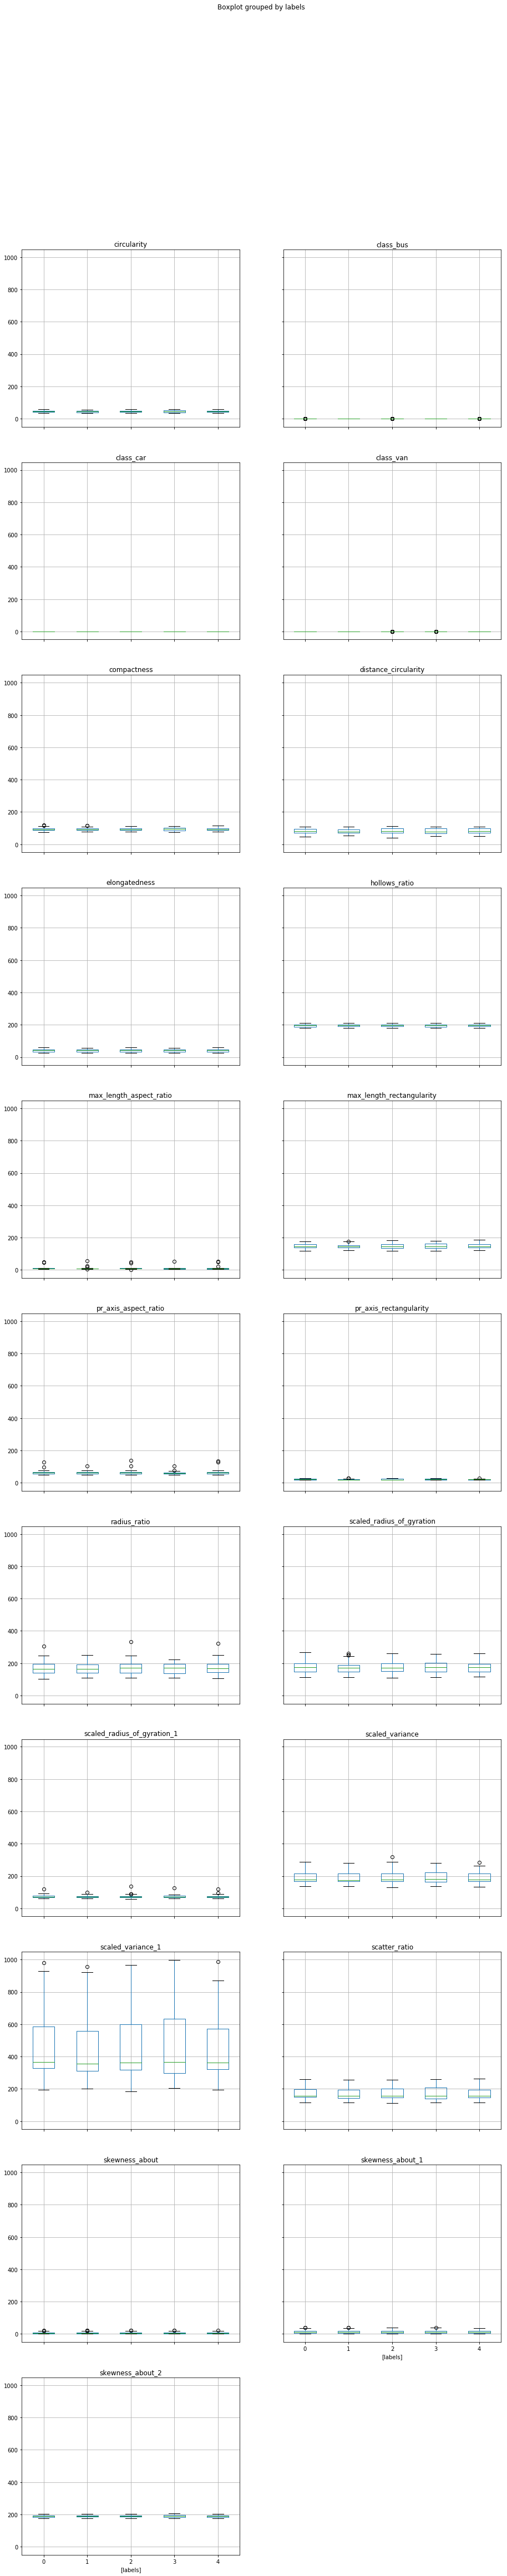

In [79]:
vehicle_analysis.boxplot(by = 'labels',  layout=(11,2), figsize=(15, 77))